# HW0
[link](https://docs.google.com/presentation/d/1wQ4H_JbFkFzKhLhBrRa_tfBJOhb2JAk5bBeMWf_I-7U/edit#slide=id.p)

1. [Q1](#matrix-operation)
2. [Q2](#images)

## 繳交格式
./Q1.sh matrixA.txt matrixB.txt  
	輸出檔名: ans_one.txt  
./Q2.sh  lena.png lena_modified.png  
	輸出檔名: ans_two.png  

## Hint
numpy

[PIL](https://docs.google.com/presentation/d/18z60-n4nhOYuQphWX2tEXC6ZTcaqhL_Pg1v-GDVQxJQ/edit#slide=id.p)

## matrix operation
1.  讀取.txt中的矩陣
2.  進行矩陣乘法 - matrixA * matrixB 
3.  將得到的矩陣數值，由小到大排序後輸出至ans_one.txt


In [1]:
import numpy as np
from random import randint

def make_matrix_file( n, m, output_file="./matricA.txt", interval=[0,9] ):
    matrix = np.random.randint( interval[0], interval[1] + 1, size=[n,m])
    np.savetxt(output_file, matrix, fmt="%d")
    return True

In [2]:
n, m, k = 10, 50, 5
make_matrix_file(n, m, "./data/hw1/matricA.txt")
make_matrix_file(m, k, "./data/hw1/matricB.txt")

True

In [3]:
def output_ans(file_A,file_B):
    matrix_A = np.loadtxt( file_A, dtype=int)
    matrix_B = np.loadtxt( file_B, dtype=int)
    ans_one = matrix_A.dot(matrix_B).reshape([1,-1])
    ans_one.sort()
    count = 1
    with open('./ans_one.txt', 'wt') as f:
        for elt in np.nditer(ans_one):
            f.write('{} {}\n'.format(count, elt))
            count += 1
    return True

In [4]:
output_ans("./data/hw1/matricA.txt", "./data/hw1/matricB.txt")

True

In [5]:
%save hw1.py 1 3

File `hw1.py` exists. Overwrite (y/[N])?  y
The following commands were written to file `hw1.py`:
import numpy as np
from random import randint

def make_matrix_file( n, m, output_file="./matricA.txt", interval=[0,9] ):
    matrix = np.random.randint( interval[0], interval[1] + 1, size=[n,m])
    np.savetxt(output_file, matrix, fmt="%d")
    return True
def output_ans(file_A,file_B):
    matrix_A = np.loadtxt( file_A, dtype=int)
    matrix_B = np.loadtxt( file_B, dtype=int)
    ans_one = matrix_A.dot(matrix_B).reshape([1,-1])
    ans_one.sort()
    count = 1
    with open('./ans_one.txt', 'wt') as f:
        for elt in np.nditer(ans_one):
            f.write('{} {}\n'.format(count, elt))
            count += 1
    return True


## images
1. 讀取lena.png與lena_modified.png
2. 使用後者異於前者的部分產生相同格式的新圖檔(ans_two.png)
![](./img/input1.png);![](./img/input2.png);![](./img/output.png)

In [6]:
from PIL import Image
import numpy as np

In [7]:
im1 = Image.open("./img/input1.png")
im2 = Image.open("./img/input2.png")

In [8]:
width, heigh = im1.size
data1 = im1.getdata()
data2 = im2.getdata()

In [9]:
im1.mode, im1.format

('RGB', 'PNG')

In [10]:
new_pic = list()
for pix_n in range(0, width*heigh):
    pixel_1 = data1[pix_n]
    pixel_2 = data2[pix_n]
    judge = np.sum([pixel_1[x]==pixel_2[x] for x in range(0,len(pixel_1))])
    if judge != 3:
        new_pic.append(pixel_2)
    else:
        new_pic.append((255,255,255))

In [11]:
outpuy_im = Image.new("RGB", (width,heigh), "white")

In [12]:
outpuy_im.putdata(new_pic)

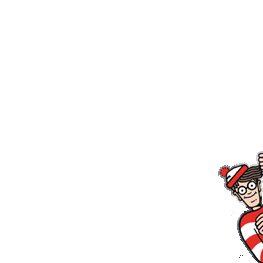

In [13]:
outpuy_im

In [14]:
outpuy_im.save("./data/hw1/ans_two.png")

use RBGA
```python
imgobj = Image.open('x.png')
pixels = imgobj.convert('RGBA')
data = imgobj.getdata()
lofpixels = []
for pixel in data:
    lofpixels.extend(pixel)
```

In [16]:
file_path_1 = "./img/input1.png"
file_path_2 = "./img/input2.png"
img1 = Image.open(file_path_1).convert("RGBA")
img2 = Image.open(file_path_2).convert("RGBA")
data1 = img1.getdata()
data2 = img2.getdata()
count = 0 
output = []
zero_tuple = (0,0,0,0)
for pixel1 in data1:
    pixel2 = data2[count]
    judge = np.sum([pixel1[x]==pixel2[x] for x in range(0,len(pixel1))])
    if judge != 4:
        output.append(pixel2)
    else:
        output.append(zero_tuple)
    count += 1
oim = Image.new("RGBA", img1.size, "white")
oim.putdata(output)
oim.save("./ans_two.png")

In [ ]:
%save 16